In [3]:
from pgmpy.factors.discrete import JointProbabilityDistribution as JPD

In [6]:
import numpy as np
px = JPD(['X'], [2], np.array([12,8])/20)
print(px)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [13]:
py = JPD(['Y'], [2], np.array([10,10])/20)
print(py)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [14]:
pxy = JPD(['X','Y'], [2,2], np.array([3,9,7,1])/20)
print(pxy)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+


In [35]:
pxy2 = JPD(['X','Y'], [2,2], np.array([6,6,4,4])/20)
print(pxy2)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+


In [20]:
pmx = pxy.marginal_distribution(['X'], inplace=False) # X를 남겨라
print(pmx)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [21]:
pmx2 = pxy.marginalize(['Y'], inplace=False)  # Y를 없애라
print(pmx2)

+------+--------+
| X    |   P(X) |
+======+========+
| X(0) | 0.6000 |
+------+--------+
| X(1) | 0.4000 |
+------+--------+


In [23]:
px_on_x0 = pxy.conditional_distribution([('X',0)], inplace=False)
print(px_on_x0)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.2500 |
+------+--------+
| Y(1) | 0.7500 |
+------+--------+


In [24]:
px_on_x1 = pxy.conditional_distribution([('X', 1)], inplace=False)
print(px_on_x1)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.8750 |
+------+--------+
| Y(1) | 0.1250 |
+------+--------+


In [27]:
pxy.check_independence(['X'],['Y']), pxy2.check_independence(['X'],['Y'])

(False, True)

In [29]:
print(px*py)
print(pxy)
print(pxy2)

+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.1500 |
+------+------+----------+
| X(0) | Y(1) |   0.4500 |
+------+------+----------+
| X(1) | Y(0) |   0.3500 |
+------+------+----------+
| X(1) | Y(1) |   0.0500 |
+------+------+----------+
+------+------+----------+
| X    | Y    |   P(X,Y) |
+======+======+==========+
| X(0) | Y(0) |   0.3000 |
+------+------+----------+
| X(0) | Y(1) |   0.3000 |
+------+------+----------+
| X(1) | Y(0) |   0.2000 |
+------+------+----------+
| X(1) | Y(1) |   0.2000 |
+------+------+----------+


In [34]:
print(pxy2)

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [36]:
print(pxy2.conditional_distribution([('X', 0)], inplace=False))

+------+--------+
| Y    |   P(Y) |
+======+========+
| Y(0) | 0.5000 |
+------+--------+
| Y(1) | 0.5000 |
+------+--------+


In [37]:
print(pxy2.check_independence(['X'],['Y']))


True


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

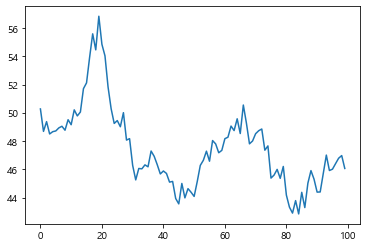

In [2]:
X_returns = np.random.normal(0, 1, 100)
X = pd.Series(np.cumsum(X_returns), name='X') + 50
plt.plot(X)

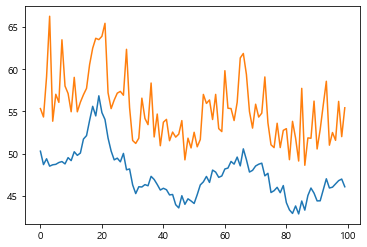

In [8]:
some_noise = np.random.exponential(3,100)
Y = X + 5 + some_noise
Y.name = "Y"
Z = pd.concat([X,Y],axis=1)
plt.plot(Z)

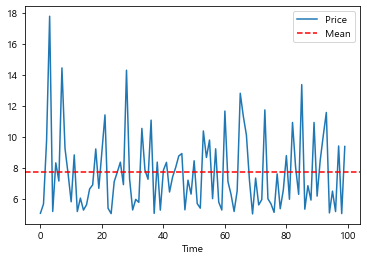

In [10]:
plt.plot(Y-X)
plt.axhline((Y-X).mean(), color='red', linestyle='--')
plt.xlabel('Time')
plt.legend(['Price', 'Mean'])

In [13]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
score, pvalue, _ = coint(X,Y)
pvalue

0.22716237084604346

In [28]:
Y2 = pd.Series(np.random.normal(0,1,1000), name='Y2') + 20
Y3 = Y2.copy()

In [33]:
for i in range(0,1000,100):
    if (i/100)%2 == 0:
        Y3[i:i+100] = 30
    else:
        Y3[i:i+100] = 10


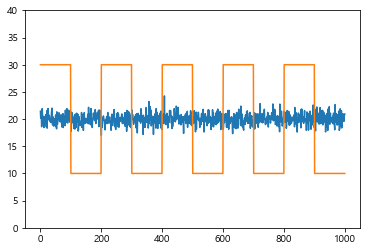

In [35]:
plt.plot(Y2)
plt.plot(Y3)
plt.ylim([0,40])
plt.show()

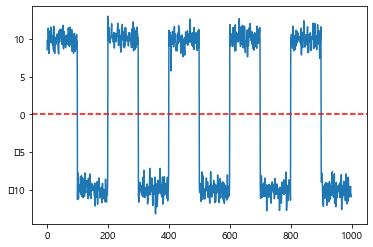

In [38]:
plt.plot(Y3-Y2)
plt.axhline((Y3-Y2).mean(), color='red', linestyle='--')
plt.show()

In [39]:
core, pvalue, _ = coint(Y2,Y3)
pvalue

0.0

In [43]:
from pgmpy.factors.discrete import TabularCPD

In [48]:
cpd_X = TabularCPD('X', 2, [[1 - 0.002], [0.002]])
print(cpd_X)


+------+-------+
| X(0) | 0.998 |
+------+-------+
| X(1) | 0.002 |
+------+-------+
